In [79]:
import numpy as np

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [81]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [82]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [83]:
np.random.seed(0)

In [84]:
# Data Preparation

In [85]:
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

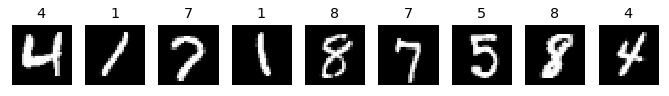

In [86]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    index = np.random.randint(0, len(X_train))
    ax.set_title(str(Y_train[index]))
    ax.imshow(X_train[index], cmap='gray')

In [87]:
X_train = X_train.reshape(-1, 28*28)
X_validation = X_validation.reshape(-1, 28*28)

In [88]:
Y_train = to_categorical(Y_train)
Y_validation = to_categorical(Y_validation)

In [89]:
# Building a model

In [90]:
class MLP(object):
    def __init__(self, dim_input, dim_output):
        self._model = None
        
        self.dim_input = dim_input # Dimension of each input data
        self.dim_output = dim_output # Dimension of each output data
        
    def inference(self):
        from keras.models import Model
        from keras.layers import Input, Dense, Activation
        
        # Input Layer
        inputs = Input(shape=(self.dim_input, ))
        
        # Hidden Layer
        x = Dense(units=256)(inputs) # dim_input -> 256
        x = Activation('relu')(x)
        
        x = Dense(units=100)(x) # 256 -> 100
        x = Activation('relu')(x)
        
        # Output Layer
        x = Dense(units=self.dim_output)(x) # 100 -> dim_output
        predictions = Activation('softmax')(x)
        
        return Model(inputs=inputs, outputs=predictions)        
 
    def predict(self, X, batch_size):
        return self._model.predict(X, batch_size=batch_size)

    def compile(self):
        self._model = self.inference()
        self._model.compile(loss='categorical_crossentropy',
                            optimizer='sgd',
                            metrics=['accuracy'])
        
    def fit(self, X_train, Y_train, X_validation, Y_validation, epochs, batch_size, verbose=1):
        history = self._model.fit(X_train,
                                  Y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=verbose,
                                  validation_data=(X_validation, Y_validation))
        
        return history
    
    def show_graph(self):
        return model_to_dot(self._model).create(prog='dot', format='svg')

In [91]:
model = MLP(dim_input=784, dim_output=10)

In [92]:
model.compile()

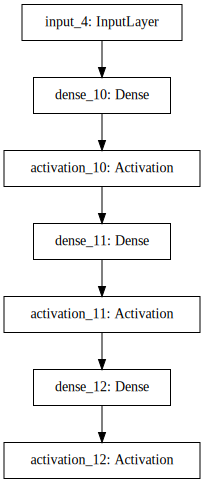

In [93]:
SVG(model.show_graph())

In [94]:
# Training the model

In [95]:
history = model.fit(X_train,
                    Y_train,
                    X_validation,
                    Y_validation,
                    epochs=10,
                    batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/step - loss: 8.4610 - acc: 0.4641 - val_loss: 4.9858 - val_acc: 0.6780
Epoch 2/10
60000/60000 [==============================] - 0s 7us/step - loss: 4.2123 - acc: 0.7280 - val_loss: 3.5025 - val_acc: 0.7692
Epoch 3/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.8659 - acc: 0.8103 - val_loss: 2.5289 - val_acc: 0.8323
Epoch 4/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.4720 - acc: 0.8366 - val_loss: 2.3471 - val_acc: 0.8453
Epoch 5/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.3251 - acc: 0.8469 - val_loss: 2.2791 - val_acc: 0.8489
Epoch 6/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.2020 - acc: 0.8551 - val_loss: 2.2931 - val_acc: 0.8476
Epoch 7/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.1363 - acc: 0.8599 - val_loss: 2.2129 - val_acc: 0.85

In [96]:
# Confirmation the result

In [97]:
def show_graph(history, key, title=None, xlabel=None, ylabel=None, yscale=None):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(111)
    ax.plot(history[key])

    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    if yscale:
        plt.yscale(yscale)

    plt.show()

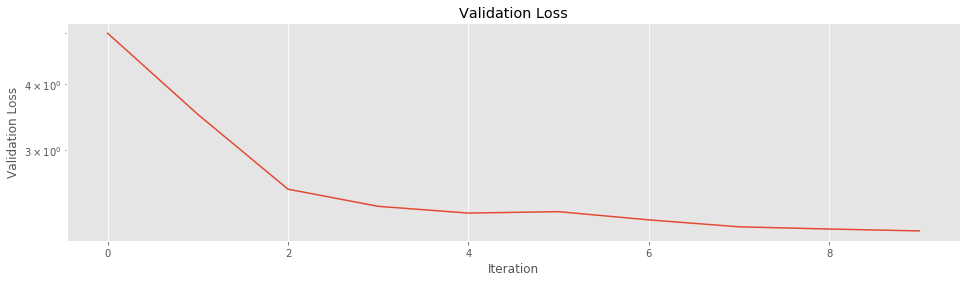

In [99]:
show_graph(history.history, 'val_loss', 'Validation Loss', 'Iteration', 'Validation Loss', 'log')

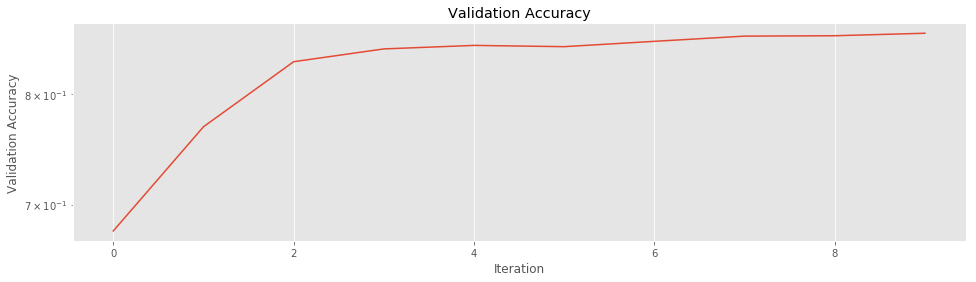

In [100]:
show_graph(history.history, 'val_acc', 'Validation Accuracy', 'Iteration', 'Validation Accuracy', 'log')

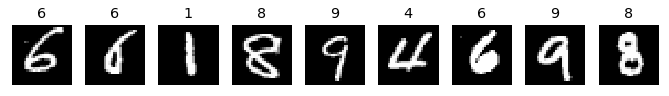

In [104]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    index = np.random.randint(0, len(X_validation))
    ax.set_title(str(np.argmax(Y_validation[index])))
    ax.imshow(X_validation[index].reshape(28, 28), cmap='gray')